In [2]:
import pandas as pd
import os,sys

os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/12.SafeDriverPrediction/02.DataCollection/')


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [4]:
train.columns.tolist()

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [6]:
train['target'].value_counts()/train['target'].shape[0]


0    0.963552
1    0.036448
Name: target, dtype: float64

In [8]:
train.apply(lambda x: x.unique().shape[0],axis=0)

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          5
ps_ind_03             12
ps_ind_04_cat          3
ps_ind_05_cat          8
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5013
ps_car_01_cat         13
ps_car_02_cat          3
ps_car_03_cat          3
ps_car_04_cat         10
ps_car_05_cat          3
ps_car_06_cat         18
ps_car_07_cat          3
ps_car_08_cat          2
ps_car_09_cat          6
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              5
ps_car_12            184
ps_car_13          70482
ps_car_14            850
ps_car_15             15
ps_calc_01            10


In [12]:
bin_vars=filter(lambda x: 'bin' in x,train.columns.tolist())
cat_vars=filter(lambda x: 'cat' in x,train.columns.tolist())
num_vars=list(set(train.columns)-set(bin_vars+cat_vars+['id','target']))

In [43]:
output=[]
for bin_var in bin_vars:
    ct=pd.crosstab(train[bin_var],train['target']).stack().tolist()
    ct.append(bin_var)
    output.append(ct)

pd.DataFrame(output,columns=['0 0', '0 1', '1 0', '1 1','column'])

,0 0,0 1,1 0,1 1,column
0,345846,15006,227672,6688,ps_ind_06_bin
1,427773,14450,145745,7244,ps_ind_07_bin
2,480049,17595,93469,4099,ps_ind_08_bin
3,466886,18031,106632,3663,ps_ind_09_bin
4,573308,21682,210,12,ps_ind_10_bin
5,572557,21648,961,46,ps_ind_11_bin
6,568189,21405,5329,289,ps_ind_12_bin
7,572983,21665,535,29,ps_ind_13_bin
8,193057,8825,380461,12869,ps_ind_16_bin
9,505424,17719,68094,3975,ps_ind_17_bin


In [44]:
train[cat_vars].apply(lambda x: x.unique().shape[0],axis=0)

ps_ind_02_cat      5
ps_ind_04_cat      3
ps_ind_05_cat      8
ps_car_01_cat     13
ps_car_02_cat      3
ps_car_03_cat      3
ps_car_04_cat     10
ps_car_05_cat      3
ps_car_06_cat     18
ps_car_07_cat      3
ps_car_08_cat      2
ps_car_09_cat      6
ps_car_10_cat      3
ps_car_11_cat    104
dtype: int64

In [49]:
train[num_vars].corrwith(train['target'])

ps_ind_01     0.018570
ps_ind_03     0.008360
ps_calc_02    0.001360
ps_calc_03    0.001907
ps_calc_01    0.001782
ps_reg_02     0.034800
ps_reg_03     0.030888
ps_calc_04    0.000033
ps_reg_01     0.022888
ps_calc_08   -0.001006
ps_calc_09    0.000719
ps_car_11    -0.001213
ps_car_13     0.053899
ps_car_12     0.038790
ps_car_15     0.027667
ps_car_14    -0.004474
ps_ind_14     0.007443
ps_ind_15    -0.021506
ps_calc_06    0.000082
ps_calc_07   -0.000103
ps_calc_11    0.000371
ps_calc_10    0.001061
ps_calc_13   -0.000446
ps_calc_12   -0.001133
ps_calc_14    0.001362
ps_calc_05    0.000771
dtype: float64

In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

def get_next_range(arr,group_range,start):
    if group_range + start >=100:
        return 100
    elif (100 - group_range/2) < start + group_range:
        return 100
    elif arr[start+group_range] ==  arr[start] and np.max(arr)>arr[start]:
        return np.max(np.where(arr > arr[start]))
    elif arr[start+group_range] ==  arr[start] and np.max(arr)==arr[start]:
        return 100
    else:
        return group_range + start
        
def get_risk_table_numerical(df,var,target,title,groups=10):
    df1 = df[[var,target]]
    df2 = df1.dropna()
    bins = []
    if np.any(df[var]<0):
        bins.append(np.min(df[var]))
    #if np.any(df[var]==0):
    #    bins.append(0)
    df3 = df2[df2[var]>0]
    begin_traverse = 0
    percentiles = np.array([np.percentile(df3[var],p) for p in range(0,100)])
    group_range =  int(100/groups)
    while (begin_traverse <100):
        bins += [percentiles[begin_traverse]]
        begin_traverse = get_next_range(percentiles,group_range,begin_traverse)
    bins.append(np.max(df[var])+1)
    bins=sorted(list(set(bins)))
    print var, bins
    df2['BINS'] = pd.cut(df2[var], bins, right=False, labels=None, retbins=False, precision=3, include_lowest=False)
    df4 = df2.groupby(df2['BINS']).agg([ np.mean, sum, np.size ])
    df5 = df4[target][['sum','size']]
    df5['Bin Mean'] = df4[var][['mean']]
    df5['LOG ODDS'] = np.log(df5['sum']/(df5['size']-df5['sum']))
    df5['Population Percentage'] = 1.0*df5['size']/len(df1)
    
    df5.sort_values(by='Bin Mean', inplace=True)  
    if np.any(df1[var].isnull()):
        df6 = df1[df1[var].isnull()]
        missing_targets = np.sum(df6[target])
        missing_count = len(df6)
        values = np.array([missing_targets,missing_count,np.log(1.0*missing_targets/(missing_count-missing_targets)),1.0*missing_count/len(df1) ])
        df6 = pd.DataFrame(values,index = ['sum','size','LOG ODDS','Population Percentage'],columns = ["Missing"]).T
        df5 = pd.concat([df6,df5])
        
        
        
    plt.figure()
    plt.plot(range(0,len(df5)), df5['LOG ODDS'],'g-',label = 'Log Odds')
    plt.bar(range(0,len(df5)), df5['Population Percentage'], label = 'Population%')
    plt.plot(range(0,len(df5)), [0 for x in df5.index],'k-')
    plt.xticks(range(0,len(df5)),  df5.index, rotation=45)
    
    y_max = 1.0
    y_min = 0.0
    if np.max(df5['LOG ODDS']) > 1:
        y_max = np.ceil(np.max(df5['LOG ODDS'])*10)/10.0
    if np.min(df5['LOG ODDS']) < 0:
        y_min = np.floor(np.min(df5['LOG ODDS'])*10)/10.0-0.05
     
    plt.xlim(0, len(df5))
    plt.ylim([y_min, y_max+0.05])
    plt.xlabel(var)
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.savefig('../Bivariates/%s.png'%var,figsize=(200, 200))
    
    return df5

ps_ind_01 [1.0, 7.0, 8]
ps_ind_03 [1.0, 11.0, 12]
ps_calc_02 [0.10000000000000001, 0.90000000000000002, 1.8999999999999999]
ps_calc_03 [0.10000000000000001, 0.90000000000000002, 1.8999999999999999]
ps_calc_01 [0.10000000000000001, 0.89999999999999991, 1.8999999999999999]
ps_reg_02 [0.10000000000000001, 0.20000000000000001, 1.7, 2.7999999999999998]
ps_reg_03 [-1.0, 0.061237243600000012, 0.53851648070000002, 0.60415229869999998, 0.66379590239999997, 0.72844011419999999, 0.80156097709999996, 0.88952234370000005, 1.0093314619, 1.1734031703000001, 1.4057915919999999, 5.0379450218999997]
ps_calc_04 [1.0, 5.0, 6]
ps_reg_01 [0.10000000000000001, 0.20000000000000001, 0.40000000000000002, 0.5, 0.59999999999999998, 0.69999999999999996, 0.80000000000000004, 0.90000000000000002, 0.90000000000000013, 1.8999999999999999]
ps_calc_08 [2.0, 7.0, 8.0, 9.0, 12.0, 13]
ps_calc_09 [1.0, 5.0, 8]
ps_car_11 [-1, 1.0, 3.0, 4]
ps_car_13 [0.25061906820000002, 0.59324712280000003, 0.64686146280000001, 0.69056510579

C:\Users\arpit.goel\AppData\Local\Continuum2\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


ps_car_15 [1.0, 2.4494897428, 2.8284271247000001, 3.0, 3.1622776602, 3.3166247904000001, 3.4641016151000001, 3.7416573868, 4.7416573868]
ps_car_14 [-1.0, 0.1095445115, 0.31811947439999999, 0.33734255590000012, 0.35832945729999999, 0.36510272529999999, 0.37349698790000002, 0.38262252940000002, 0.39370039369999998, 0.4049691346, 0.42520583249999999, 1.6363961031000001]
ps_ind_14 [1.0, 3.0, 5]
ps_ind_15 [1.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14]
ps_calc_06 [1.0, 6.0, 7.0, 10.0, 11]
ps_calc_07 [1.0, 6.0, 10]
ps_calc_11 [1.0, 3.0, 12.0, 20]


C:\Users\arpit.goel\AppData\Local\Continuum2\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ps_calc_10 [1.0, 5.0, 6.0, 7.0, 8.0, 16.0, 26]
ps_calc_13 [1.0, 7.0, 14]
ps_calc_12 [1.0, 5.0, 11]
ps_calc_14 [1.0, 4.0, 5.0, 6.0, 7.0, 15.0, 24]
ps_calc_05 [1.0, 5.0, 7]


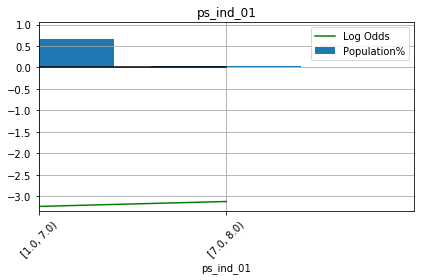

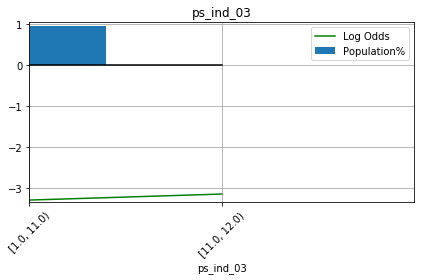

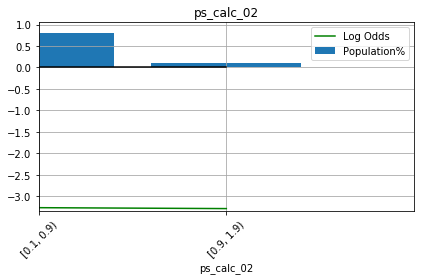

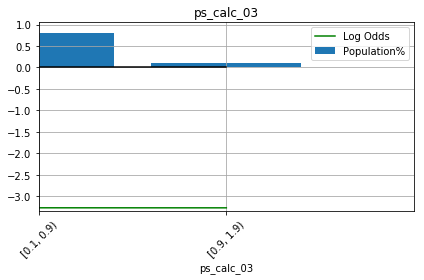

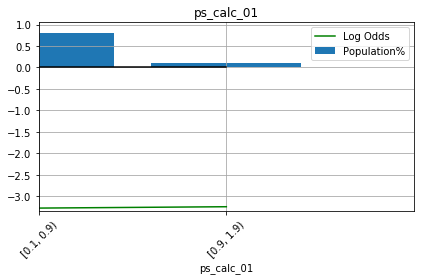

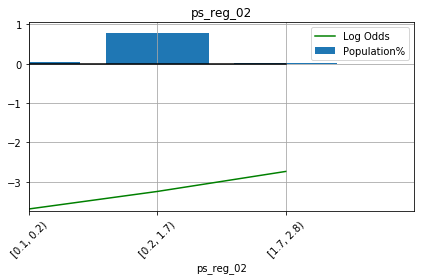

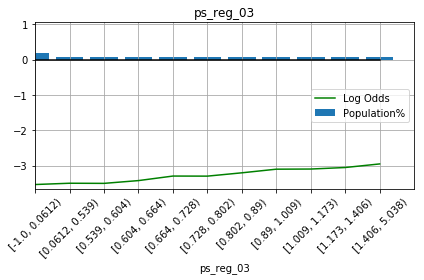

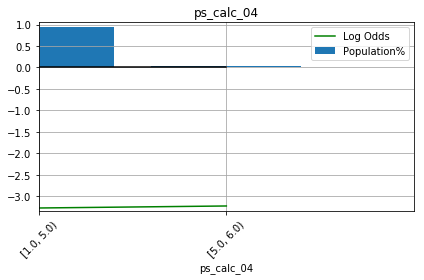

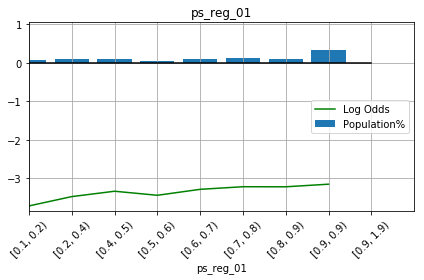

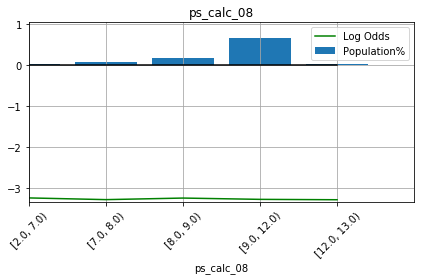

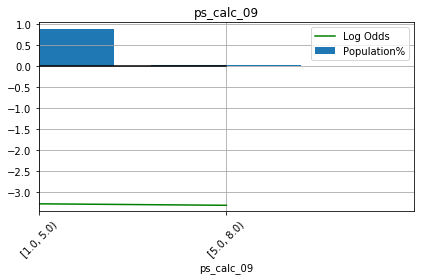

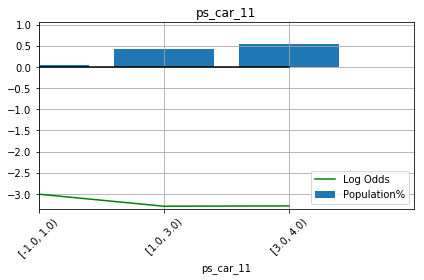

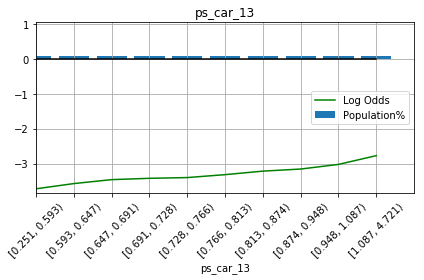

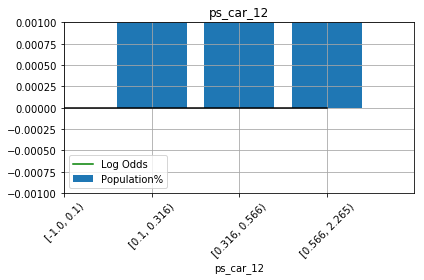

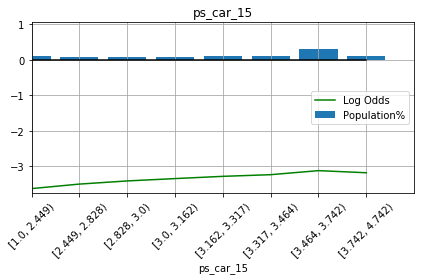

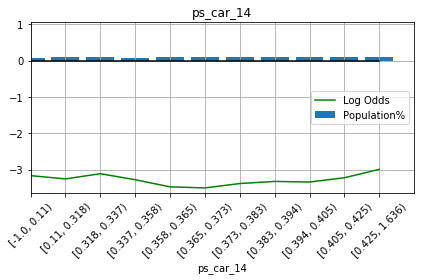

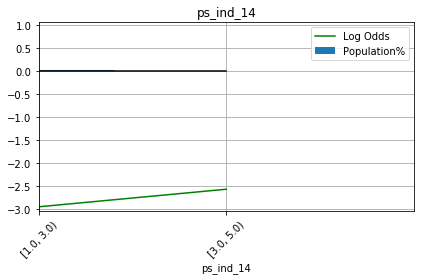

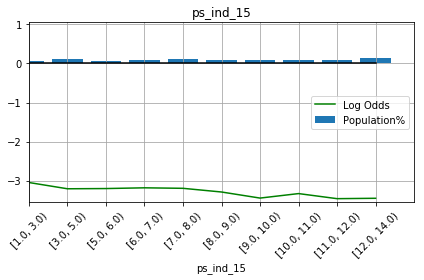

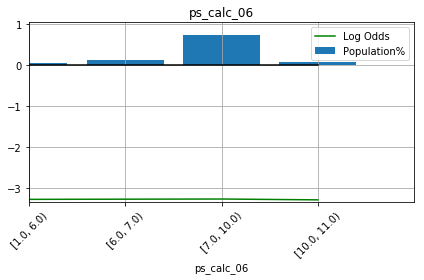

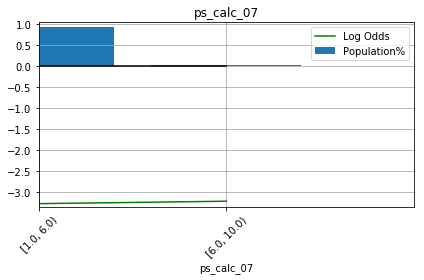

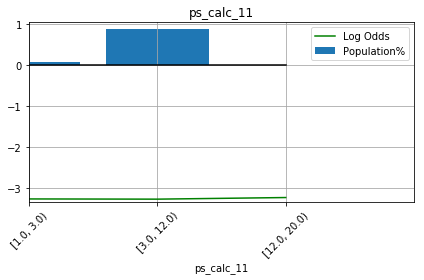

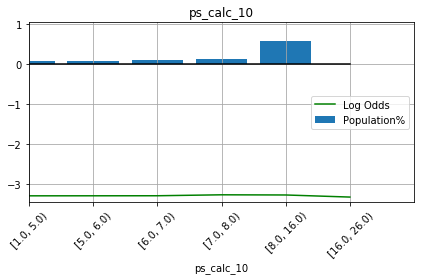

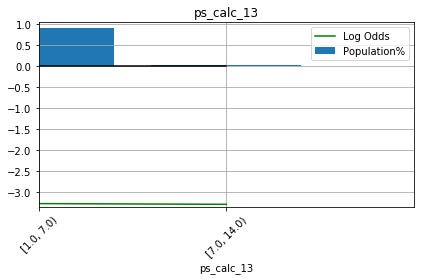

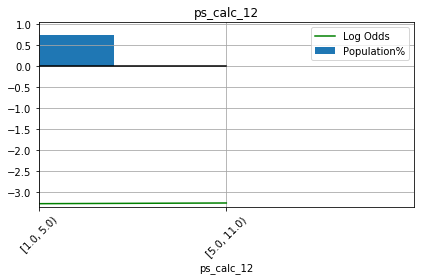

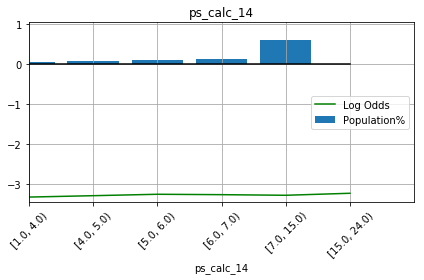

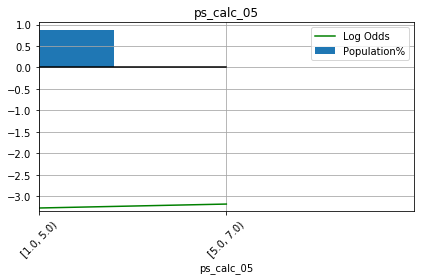

In [92]:
for num_var in num_vars:
    get_risk_table_numerical(train,num_var,'target', num_var,10)


C:\Users\arpit.goel\AppData\Local\Continuum2\Anaconda2\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arpit.goel\AppData\Local\Continuum2\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\arpit.goel\AppData\Local\Continuum2\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


,Bads,Goods,LOG ODDS,Population Percentage
1,416431,15428,-3.295537,0.725555
3,27137,1049,-3.253061,0.047355
2,118860,4713,-3.227622,0.207612
4,10914,464,-3.157917,0.019116
OTHER,176,40,-1.481605,0.000363
0,334894,12071,-3.323008,0.582927
1,238574,9590,-3.213959,0.416934
OTHER,50,33,-0.415515,0.000139
0,510128,17881,-3.350923,0.887094
3,7879,354,-3.102659,0.013832


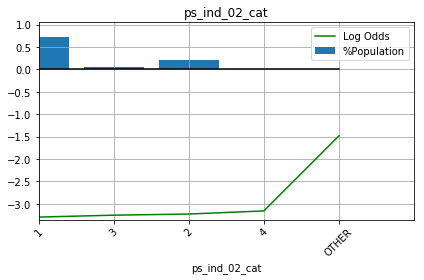

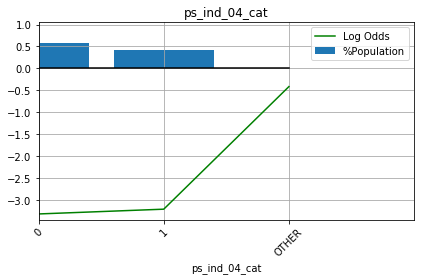

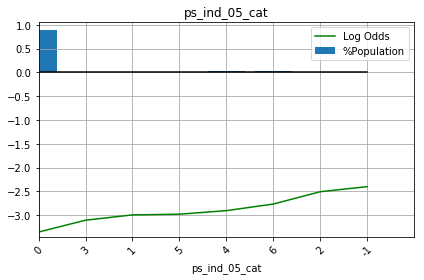

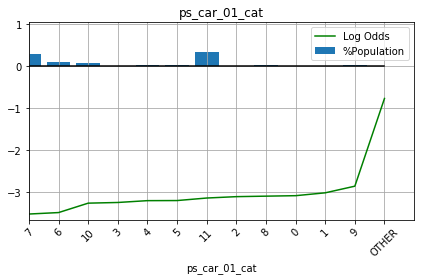

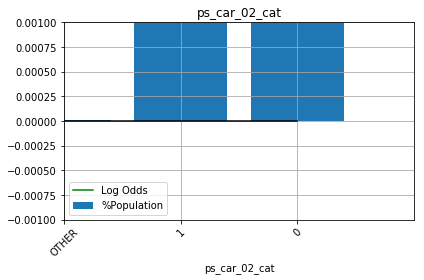

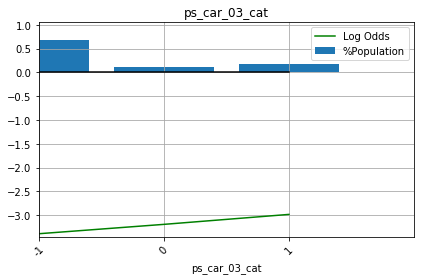

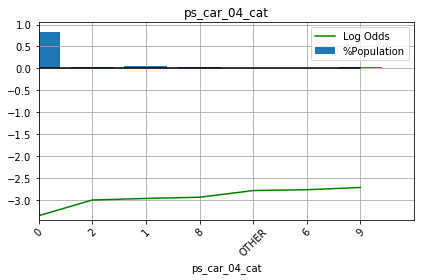

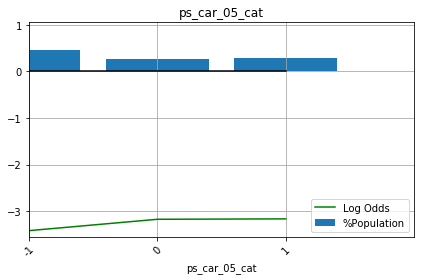

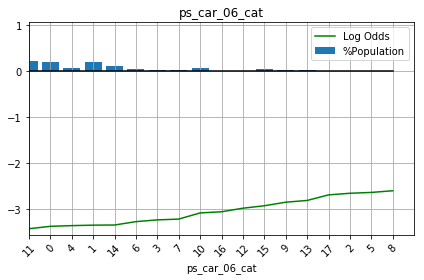

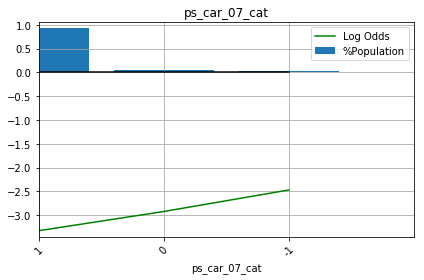

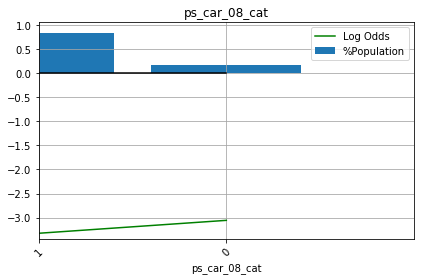

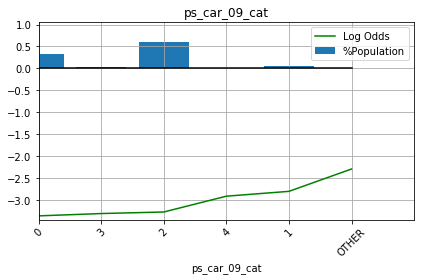

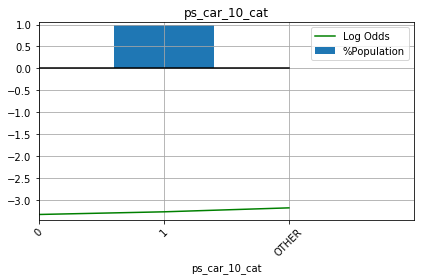

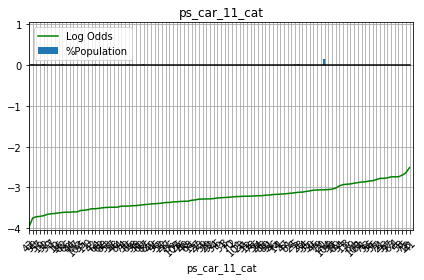

In [93]:
def get_risk_table_categorical(df, var ,target,title, cutoff = 1000, logodds_max = 1, show = 1):

    df2 = df[[var, target]]
    df2[var][df2[var].isnull()]="MISSING"
    
    freq1 = df2[var].value_counts()
    dict1 = {}
    for key,value in zip(list(freq1.index), list(freq1)):
        if value < cutoff:
            dict1[key] = "OTHER"
        else:
            dict1[key] = str(key)
    
    
    df2["Clean_%s"%var] = df2[[var]].applymap(dict1.get)
    
    df4 = pd.crosstab(df2["Clean_%s"%var], df2[target],colnames=[target])
    df4.columns = ['Bads','Goods']
    df4['LOG ODDS'] = np.log(df4['Goods']/df4['Bads'])
    df4['Population Percentage'] = (df4['Goods']+df4['Bads'])/(df4['Goods']+df4['Bads']).sum()
    df4.sort_values(by='LOG ODDS', inplace=True)
    df5 = df4
    
    plt.figure()
    plt.plot(range(0,len(df5)), df5['LOG ODDS'],'g-',label = 'Log Odds')
    plt.bar(range(0,len(df5)), df5['Population Percentage'], label = '%Population')
    plt.plot(range(0,len(df5)), [0 for x in df5.index],'k-')
    plt.xticks(range(0,len(df5)),  df5.index, rotation=45)
    
    y_max = 1.0
    y_min = 0.0
    if np.max(df5['LOG ODDS']) > 1:
        y_max = np.ceil(np.max(df5['LOG ODDS'])*10)/10.0
    if np.min(df5['LOG ODDS']) < 0:
        y_min = np.floor(np.min(df5['LOG ODDS'])*10)/10.0-0.05
     
    plt.xlim(0, len(df5))
    plt.ylim([y_min, y_max+0.05])
    plt.xlabel(var)
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.savefig('../Bivariates/%s.png'%var,figsize=(150, 150))
    return df5
    
pd.concat([get_risk_table_categorical(train, var ,"target",var, cutoff = 1000, logodds_max = 1, show = 0) for var in cat_vars])
